In [258]:
pa = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new\3_layer_32-16-8'
path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN-13.9\new'

In [3]:
pa = r'C:/Users/harik/OneDrive/Documents/Python/Graphene/ANN/new'
path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN-13.9\new-1'

In [1]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten, Input
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import glob
import os
import sklearn
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data_13.9.csv',delimiter=",")
test_data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\test_data_13.9.csv',delimiter=",")
data = data.dropna()
test_data = test_data.dropna()
df = data.append(test_data, ignore_index=True)
df = df.dropna()
df = df.drop_duplicates()
df = df.sample(frac = 1, random_state = 20)
print(df.shape)

(185, 4)


In [160]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
df.CO = scaler_co.fit_transform(df[['CO']])
df.CS = scaler_crack.fit_transform(df[['CS']])
df.FS = scaler_fs.fit_transform(df[['FS']])
df.T = scaler_temp.fit_transform(df[['T']])
data.CO = scaler_co.transform(data[['CO']])
data.CS = scaler_crack.transform(data[['CS']])
data.FS = scaler_fs.transform(data[['FS']])
data.T = scaler_temp.transform(data[['T']])

In [161]:
test_data.CO = scaler_co.transform(test_data[['CO']])
test_data.CS = scaler_crack.transform(test_data[['CS']])
test_data.FS = scaler_fs.transform(test_data[['FS']])
test_data.T = scaler_temp.transform(test_data[['T']])

In [3]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)
train.to_csv('train-13.9.csv')
test.to_csv('test-13.9.csv')

data_x = data[['T', 'CS', 'CO']]
data_y = data['FS']
test_x = test_data[['T', 'CS', 'CO']]
test_y = test_data['FS']
print(data_x.shape)
print(test_x.shape)

In [163]:
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']
testing_x = test_data[['T', 'CS', 'CO']]
testing_y = test_data['FS']

In [260]:
os.chdir(pa)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [261]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [262]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


loaded_model = Sequential([
    Input(shape = 3),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    #Dense(units=2,activation='relu'),
    Dense(units=1,activation='linear')
    ])
loaded_model.summary()

Epoch 1/200
67/67 [==============================] - 1s 8ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/200
67/67 [==============================] - 0s 6ms/step - loss: 0.0012 - m

67/67 [==============================] - 0s 6ms/step - loss: 3.6464e-04 - mse: 3.6464e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 118/200
67/67 [==============================] - 0s 5ms/step - loss: 3.4741e-04 - mse: 3.4741e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 119/200
67/67 [==============================] - 0s 5ms/step - loss: 3.8165e-04 - mse: 3.8165e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 120/200
67/67 [==============================] - 0s 5ms/step - loss: 3.5286e-04 - mse: 3.5286e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 121/200
67/67 [==============================] - 0s 5ms/step - loss: 3.4959e-04 - mse: 3.4959e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 122/200
67/67 [==============================] - 0s 6ms/step - loss: 3.4498e-04 - mse: 3.4498e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 123/200
67/67 [==============================] - 0s 6ms/step - loss: 3.3144e-04 - mse: 3.3144e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 124/200
67/67 [======

67/67 [==============================] - 0s 6ms/step - loss: 2.3095e-04 - mse: 2.3095e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 175/200
67/67 [==============================] - 0s 6ms/step - loss: 2.2543e-04 - mse: 2.2543e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 176/200
67/67 [==============================] - 1s 11ms/step - loss: 2.2463e-04 - mse: 2.2463e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 177/200
67/67 [==============================] - 0s 6ms/step - loss: 2.1488e-04 - mse: 2.1488e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 178/200
67/67 [==============================] - 0s 6ms/step - loss: 2.2315e-04 - mse: 2.2315e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 179/200
67/67 [==============================] - 0s 6ms/step - loss: 2.3942e-04 - mse: 2.3942e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 180/200
67/67 [==============================] - 0s 6ms/step - loss: 2.1723e-04 - mse: 2.1723e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 181/200
67/67 [=====

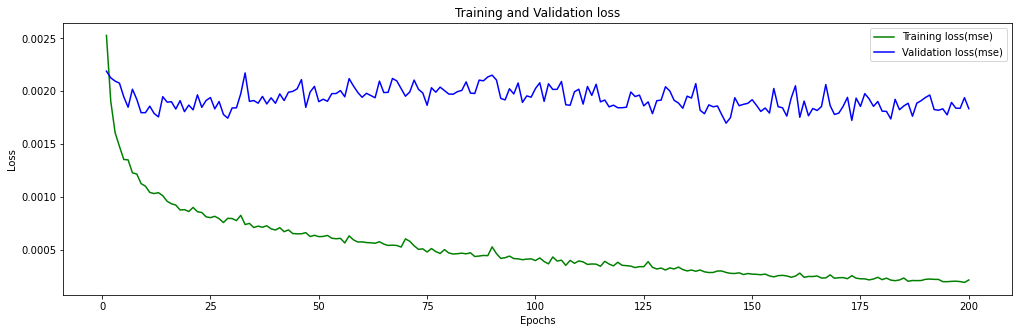

In [263]:
loaded_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_1 = loaded_model.fit(train_x,train_y,epochs=200,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,201)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.savefig('Lossvepochs.png', dpi = 100)
plt.legend()
plt.show()

Epoch 1/400
67/67 [==============================] - 1s 8ms/step - loss: 2.0961e-04 - mse: 2.0961e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2/400
67/67 [==============================] - 0s 6ms/step - loss: 1.9393e-04 - mse: 1.9393e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 3/400
67/67 [==============================] - 0s 6ms/step - loss: 1.9057e-04 - mse: 1.9057e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/400
67/67 [==============================] - 0s 6ms/step - loss: 2.0408e-04 - mse: 2.0408e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/400
67/67 [==============================] - 0s 5ms/step - loss: 1.8716e-04 - mse: 1.8716e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/400
67/67 [==============================] - 0s 6ms/step - loss: 1.8553e-04 - mse: 1.8553e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/400
67/67 [==============================] - 0s 6ms/step - loss: 1.9683e-04 - mse: 1.9683e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/400
67/67 [========

67/67 [==============================] - 0s 5ms/step - loss: 1.2839e-04 - mse: 1.2839e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 118/400
67/67 [==============================] - 0s 5ms/step - loss: 1.3349e-04 - mse: 1.3349e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 119/400
67/67 [==============================] - 0s 5ms/step - loss: 1.2081e-04 - mse: 1.2081e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 120/400
67/67 [==============================] - 0s 5ms/step - loss: 1.2614e-04 - mse: 1.2614e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 121/400
67/67 [==============================] - 0s 5ms/step - loss: 1.3296e-04 - mse: 1.3296e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 122/400
67/67 [==============================] - 0s 5ms/step - loss: 1.1709e-04 - mse: 1.1709e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 123/400
67/67 [==============================] - 0s 5ms/step - loss: 1.7410e-04 - mse: 1.7410e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 124/400
67/67 [======

67/67 [==============================] - 0s 6ms/step - loss: 9.1486e-05 - mse: 9.1486e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 233/400
67/67 [==============================] - 0s 6ms/step - loss: 8.9457e-05 - mse: 8.9457e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 234/400
67/67 [==============================] - 0s 6ms/step - loss: 7.8773e-05 - mse: 7.8773e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 235/400
67/67 [==============================] - 0s 5ms/step - loss: 9.0039e-05 - mse: 9.0039e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 236/400
67/67 [==============================] - 0s 6ms/step - loss: 9.0194e-05 - mse: 9.0194e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 237/400
67/67 [==============================] - 0s 5ms/step - loss: 1.0356e-04 - mse: 1.0356e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 238/400
67/67 [==============================] - 0s 6ms/step - loss: 9.0477e-05 - mse: 9.0477e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 239/400
67/67 [======

Epoch 344/400
67/67 [==============================] - 0s 5ms/step - loss: 6.7345e-05 - mse: 6.7345e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 345/400
67/67 [==============================] - 0s 5ms/step - loss: 7.9340e-05 - mse: 7.9340e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 346/400
67/67 [==============================] - 0s 5ms/step - loss: 7.5416e-05 - mse: 7.5416e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 347/400
67/67 [==============================] - 0s 5ms/step - loss: 7.8568e-05 - mse: 7.8568e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 348/400
67/67 [==============================] - 0s 5ms/step - loss: 6.9812e-05 - mse: 6.9812e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 349/400
67/67 [==============================] - 0s 5ms/step - loss: 7.1634e-05 - mse: 7.1634e-05 - val_loss: 0.0015 - val_mse: 0.00154e-0
Epoch 350/400
67/67 [==============================] - 0s 5ms/step - loss: 7.2814e-05 - mse: 7.2814e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 351

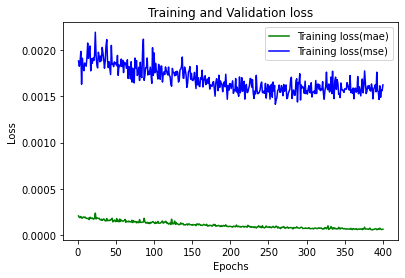

In [264]:
loaded_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_2 = loaded_model.fit(train_x,train_y,epochs=400,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [265]:
y_pred = loaded_model.predict(test_x).reshape(-1,1)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
loaded_model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.0005360935203658234 0.9905426233352608
19/19 [==============================] - 0s 5ms/step - loss: 5.3609e-04 - mse: 5.3609e-04
27.168697795710262 0.9905426217049809
4.610062312334109


In [266]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.head(20)

,Prediced,True,Error
0,126.495201,140.090,13.594799
4,203.311920,191.840,11.471920
26,226.516800,237.770,11.253200
33,144.566605,155.440,10.873395
5,74.550171,84.530,9.979829
30,58.069981,67.660,9.590019
10,52.941879,60.190,7.248121
31,207.648056,214.110,6.461944
17,132.618378,138.715,6.096622
6,25.891134,30.090,4.198866


In [267]:
df.shape

(37, 3)

In [268]:
y_pred_t = loaded_model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
loaded_model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

0.00021366695548022128 0.9970424857341453
74/74 [==============================] - 0s 4ms/step - loss: 2.1367e-04 - mse: 2.1367e-04
10.82842899810984 0.9970424861791903
2.7569204922409196


y_pred = loaded_model.predict(testing_x)
print(y_pred.shape)
print(mean_absolute_error(y_pred, testing_y), r2_score(y_pred, testing_y))
loaded_model.evaluate(testing_x, testing_y, batch_size = 4)
test_y_np = np.array(testing_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
mean_absolute_percentage_error(y_test_in, y_pred_in)*100

In [276]:
#os.mkdir(path)
os.chdir(path)
os.remove("model.json")
os.remove('info.txt')
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN-13.9\\new'

In [277]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)]  
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True.csv')
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m, abs(p-m)]  
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True_train.csv')

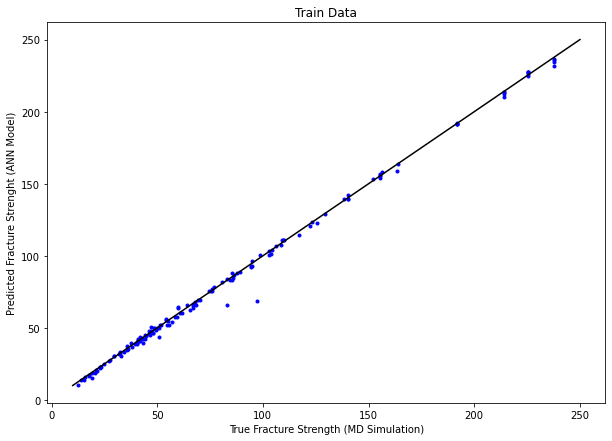

In [278]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Train Data')
plt.plot([10,250], [10, 250], color = 'black')
plt.savefig('TrueVsPred_train.png', dpi = 100)
plt.show()

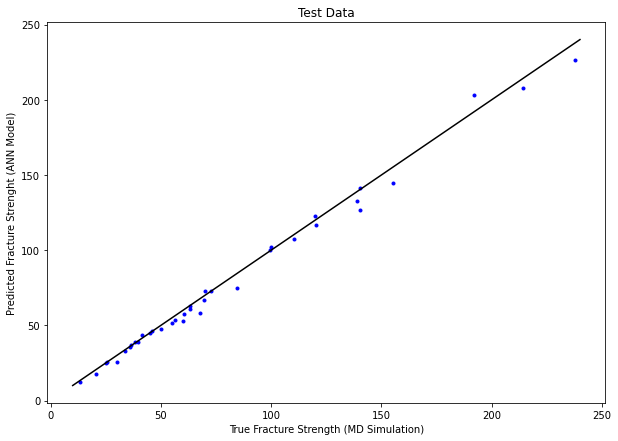

In [279]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Test Data')
plt.plot([10,240], [10, 240], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

In [280]:
model_json = loaded_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [281]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df.to_csv('history.csv')
file1 = open("info.txt","a")
file1.write("Learning rate = 0.0001 train test split = 0.20 loss = mse validation split - 0.1 of training for 200 epochs\n")
file1.write("Learning rate = 0.0001 train test split = 0.20 loss = mse for 400 epochs\n")
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.write("The errors on train dataset are \n")
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y), '\n', file = file1)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100, '\n', file = file1)
file1.close()

600


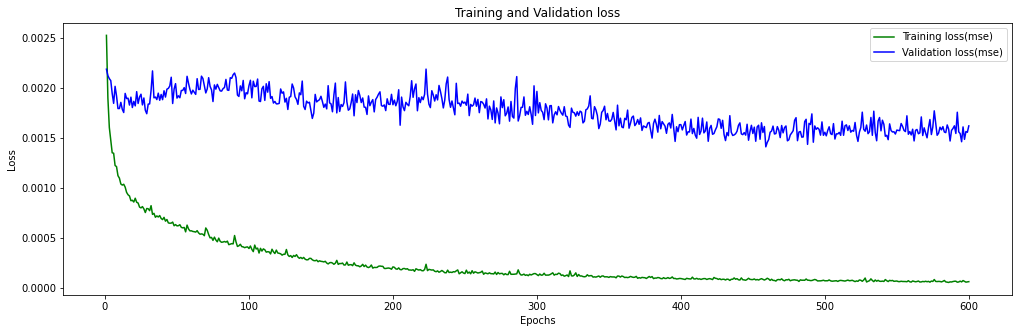

In [282]:
loss_train = hist_df['loss']
loss_val = hist_df['val_loss']
epochs = range(1,601)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Lossvepochs.png', dpi = 100)
plt.legend()
plt.show()

Loaded model from disk
Epoch 1/300
49/49 [==============================] - 1s 8ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 6/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/300
49/49 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/300
49/49 [==============================] - 0s 5ms/

49/49 [==============================] - 1s 31ms/step - loss: 1.9097e-04 - mse: 1.9097e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 119/300
49/49 [==============================] - 0s 5ms/step - loss: 1.8872e-04 - mse: 1.8872e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 120/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8693e-04 - mse: 1.8693e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 121/300
49/49 [==============================] - 0s 5ms/step - loss: 1.8654e-04 - mse: 1.8654e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 122/300
49/49 [==============================] - 2s 32ms/step - loss: 1.8434e-04 - mse: 1.8434e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 123/300
49/49 [==============================] - 0s 8ms/step - loss: 1.8294e-04 - mse: 1.8294e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 124/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8279e-04 - mse: 1.8279e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 125/300
49/49 [====

49/49 [==============================] - 0s 5ms/step - loss: 8.6887e-05 - mse: 8.6887e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 234/300
49/49 [==============================] - 2s 31ms/step - loss: 8.6124e-05 - mse: 8.6124e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 235/300
49/49 [==============================] - 0s 5ms/step - loss: 8.5699e-05 - mse: 8.5699e-05 - val_loss: 9.8645e-04 - val_mse: 9.8645e-04
Epoch 236/300
49/49 [==============================] - 0s 6ms/step - loss: 8.5299e-05 - mse: 8.5299e-05 - val_loss: 9.9313e-04 - val_mse: 9.9313e-04
Epoch 237/300
49/49 [==============================] - 0s 5ms/step - loss: 8.5350e-05 - mse: 8.5350e-05 - val_loss: 9.9021e-04 - val_mse: 9.9021e-04
Epoch 238/300
49/49 [==============================] - 1s 30ms/step - loss: 8.3921e-05 - mse: 8.3921e-05 - val_loss: 9.9664e-04 - val_mse: 9.9664e-04
Epoch 239/300
49/49 [==============================] - 0s 6ms/step - loss: 8.4036e-05 - mse: 8.4036e-05 - val_loss: 0.0010 - val_mse: 

Epoch 288/300
49/49 [==============================] - 0s 6ms/step - loss: 6.6956e-05 - mse: 6.6956e-05 - val_loss: 9.8000e-04 - val_mse: 9.8000e-04
Epoch 289/300
49/49 [==============================] - 0s 5ms/step - loss: 6.5856e-05 - mse: 6.5856e-05 - val_loss: 9.6443e-04 - val_mse: 9.6443e-04
Epoch 290/300
49/49 [==============================] - 1s 31ms/step - loss: 6.6005e-05 - mse: 6.6005e-05 - val_loss: 9.5255e-04 - val_mse: 9.5255e-04
Epoch 291/300
49/49 [==============================] - 0s 5ms/step - loss: 6.5710e-05 - mse: 6.5710e-05 - val_loss: 9.7104e-04 - val_mse: 9.7104e-04
Epoch 292/300
49/49 [==============================] - 0s 6ms/step - loss: 6.5743e-05 - mse: 6.5743e-05 - val_loss: 9.7751e-04 - val_mse: 9.7751e-04
Epoch 293/300
49/49 [==============================] - 2s 32ms/step - loss: 6.4764e-05 - mse: 6.4764e-05 - val_loss: 9.4263e-04 - val_mse: 9.4263e-04
Epoch 294/300
49/49 [==============================] - 0s 5ms/step - loss: 6.4827e-05 - mse: 6.4827e-05 

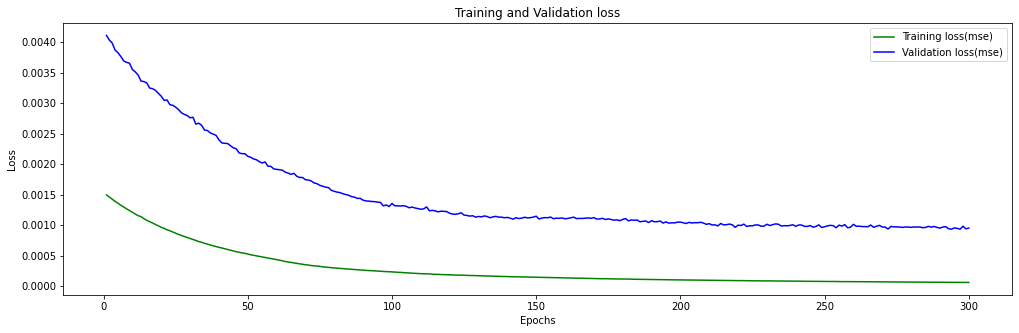

In [352]:
os.chdir(pa)
#loading model from disk
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
os.chdir(path)
#training the loaded model
loaded_model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics = ['mse'])
history_1 = loaded_model.fit(train_x,train_y,epochs=300,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
os.chdir(path)
epochs = range(1,301)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Lossvepochs_300.png', dpi = 100)
plt.legend()
plt.show()
hist_df_1 = pd.DataFrame(history_1.history) 
#hist_df_2 = pd.DataFrame(history_2.history)
hist_df = hist_df_1#.append(hist_df_2, ignore_index = True)
hist_df.to_csv('History_300.csv')

In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [ ]:
from keras.models import model_from_json
json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_1.h5")
print("Loaded model from disk")

In [36]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: 